## 1. Setup & Imports

In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

# Paths
PROJECT_ROOT = Path("../..").resolve()
DATA_DIR = PROJECT_ROOT / "data" / "raw" / "plantvillage dataset" / "color"
FIGURES_DIR = PROJECT_ROOT / "ml" / "outputs" / "figures"

# Create figures directory if not exists
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print(f"Project root: {PROJECT_ROOT}")
print(f"Data directory: {DATA_DIR}")
print(f"Figures directory: {FIGURES_DIR}")
print(f"Data directory exists: {DATA_DIR.exists()}")

Project root: D:\Repos\plant-disease-project
Data directory: D:\Repos\plant-disease-project\data\raw\plantvillage dataset\color
Figures directory: D:\Repos\plant-disease-project\ml\outputs\figures
Data directory exists: True


## 2. Dataset Overview

### 2.1 Class Listing and Counts

In [2]:
# Get all class directories
class_dirs = sorted([d for d in DATA_DIR.iterdir() if d.is_dir()])
print(f"Total number of classes: {len(class_dirs)}")
print("\nClass names:")
for i, class_dir in enumerate(class_dirs, 1):
    print(f"  {i:2d}. {class_dir.name}")

Total number of classes: 38

Class names:
   1. Apple___Apple_scab
   2. Apple___Black_rot
   3. Apple___Cedar_apple_rust
   4. Apple___healthy
   5. Blueberry___healthy
   6. Cherry_(including_sour)___healthy
   7. Cherry_(including_sour)___Powdery_mildew
   8. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
   9. Corn_(maize)___Common_rust_
  10. Corn_(maize)___healthy
  11. Corn_(maize)___Northern_Leaf_Blight
  12. Grape___Black_rot
  13. Grape___Esca_(Black_Measles)
  14. Grape___healthy
  15. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
  16. Orange___Haunglongbing_(Citrus_greening)
  17. Peach___Bacterial_spot
  18. Peach___healthy
  19. Pepper,_bell___Bacterial_spot
  20. Pepper,_bell___healthy
  21. Potato___Early_blight
  22. Potato___healthy
  23. Potato___Late_blight
  24. Raspberry___healthy
  25. Soybean___healthy
  26. Squash___Powdery_mildew
  27. Strawberry___healthy
  28. Strawberry___Leaf_scorch
  29. Tomato___Bacterial_spot
  30. Tomato___Early_blight
  31. Tomato__

In [3]:
# Count images per class
image_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff"}

class_counts = {}
for class_dir in class_dirs:
    count = len([f for f in class_dir.iterdir() 
                 if f.is_file() and f.suffix.lower() in image_extensions])
    class_counts[class_dir.name] = count

# Create DataFrame
df_classes = pd.DataFrame([
    {"class_name": name, "count": count}
    for name, count in class_counts.items()
]).sort_values("count", ascending=False).reset_index(drop=True)

# Add plant and disease columns
df_classes["plant"] = df_classes["class_name"].apply(lambda x: x.split("___")[0])
df_classes["condition"] = df_classes["class_name"].apply(lambda x: x.split("___")[1] if "___" in x else "unknown")

print(f"Total images in dataset: {df_classes['count'].sum():,}")
print(f"\nImages per class (sorted by count):")
df_classes

Total images in dataset: 54,305

Images per class (sorted by count):


class_name  count  \
0            Orange___Haunglongbing_(Citrus_greening)   5507   
1              Tomato___Tomato_Yellow_Leaf_Curl_Virus   5357   
2                                   Soybean___healthy   5090   
3                              Peach___Bacterial_spot   2297   
4                             Tomato___Bacterial_spot   2127   
5                                Tomato___Late_blight   1909   
6                             Squash___Powdery_mildew   1835   
7                         Tomato___Septoria_leaf_spot   1771   
8       Tomato___Spider_mites Two-spotted_spider_mite   1676   
9                                     Apple___healthy   1645   
10                                   Tomato___healthy   1591   
11                                Blueberry___healthy   1502   
12                             Pepper,_bell___healthy   1478   
13                               Tomato___Target_Spot   1404   
14                       Grape___Esca_(Black_Measles)   1383   
15                        Corn_(maize)___Common_rust_   1192   
16                                  Grape___Black_rot   1180   
17                             Corn_(maize)___healthy   1162   
18                           Strawberry___Leaf_scorch   1109   
19         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)   1076   
20           Cherry_(including_sour)___Powdery_mildew   1052   
21                               Potato___Late_blight   1000   
22                              Potato___Early_blight   1000   
23                              Tomato___Early_blight   1000   
24                      Pepper,_bell___Bacterial_spot    997   
25                Corn_(maize)___Northern_Leaf_Blight    985   
26                                 Tomato___Leaf_Mold    952   
27                  Cherry_(including_sour)___healthy    854   
28                                 Apple___Apple_scab    630   
29                                  Apple___Black_rot    621   
30  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...    513   
31                               Strawberry___healthy    456   
32                                    Grape___healthy    423   
33                       Tomato___Tomato_mosaic_virus    373   
34                                Raspberry___healthy    371   
35                                    Peach___healthy    360   
36                           Apple___Cedar_apple_rust    275   
37                                   Potato___healthy    152   

                      plant                             condition  
0                    Orange       Haunglongbing_(Citrus_greening)  
1                    Tomato         Tomato_Yellow_Leaf_Curl_Virus  
2                   Soybean                               healthy  
3                     Peach                        Bacterial_spot  
4                    Tomato                        Bacterial_spot  
5                    Tomato                           Late_blight  
6                    Squash                        Powdery_mildew  
7                    Tomato                    Septoria_leaf_spot  
8                    Tomato  Spider_mites Two-spotted_spider_mite  
9                     Apple                               healthy  
10                   Tomato                               healthy  
11                Blueberry                               healthy  
12             Pepper,_bell                               healthy  
13                   Tomato                           Target_Spot  
14                    Grape                  Esca_(Black_Measles)  
15             Corn_(maize)                          Common_rust_  
16                    Grape                             Black_rot  
17             Corn_(maize)                               healthy  
18               Strawberry                           Leaf_scorch  
19                    Grape    Leaf_blight_(Isariopsis_Leaf_Spot)  
20  Cherry_(including_sour)                        Powdery_mildew  
21                   Potato                       

In [4]:
# Summary statistics
print("Class count statistics:")
print(f"  Min:    {df_classes['count'].min():,} ({df_classes.iloc[-1]['class_name']})")
print(f"  Max:    {df_classes['count'].max():,} ({df_classes.iloc[0]['class_name']})")
print(f"  Mean:   {df_classes['count'].mean():,.1f}")
print(f"  Median: {df_classes['count'].median():,.1f}")
print(f"  Std:    {df_classes['count'].std():,.1f}")
print(f"\nImbalance ratio (max/min): {df_classes['count'].max() / df_classes['count'].min():.2f}x")

Class count statistics:
  Min:    152 (Potato___healthy)
  Max:    5,507 (Orange___Haunglongbing_(Citrus_greening))
  Mean:   1,429.1
  Median: 1,092.5
  Std:    1,271.7

Imbalance ratio (max/min): 36.23x


### 2.2 Class Distribution Visualization

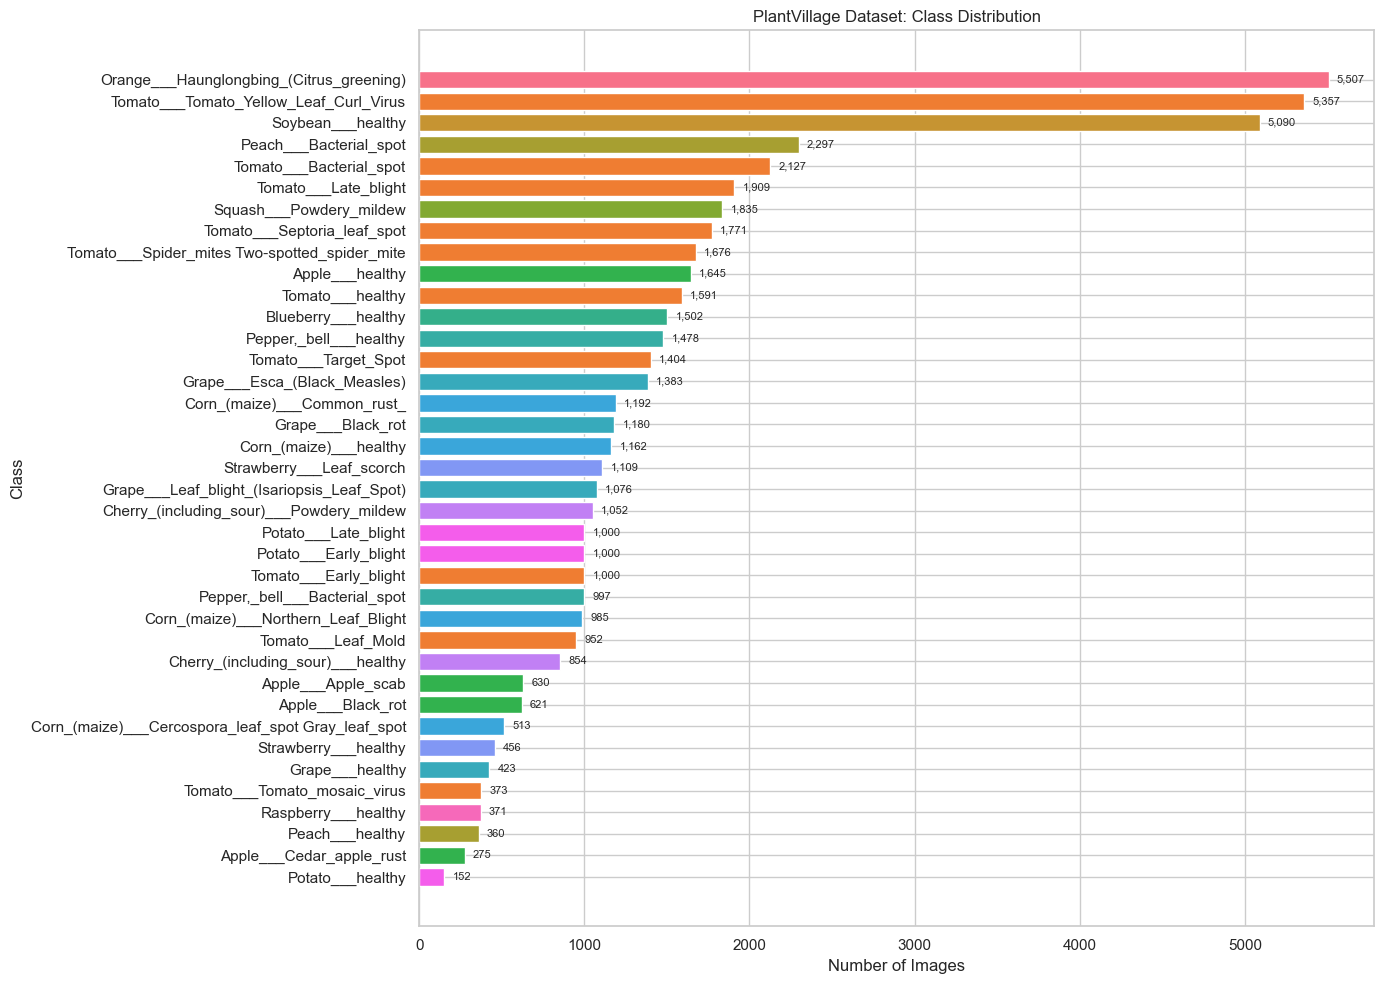

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\class_distribution.png


In [5]:
# Bar chart of class distribution
fig, ax = plt.subplots(figsize=(14, 10))

# Color by plant type
plants = df_classes["plant"].unique()
colors = sns.color_palette("husl", len(plants))
plant_colors = dict(zip(plants, colors))
bar_colors = [plant_colors[p] for p in df_classes["plant"]]

bars = ax.barh(df_classes["class_name"], df_classes["count"], color=bar_colors)
ax.set_xlabel("Number of Images")
ax.set_ylabel("Class")
ax.set_title("PlantVillage Dataset: Class Distribution")
ax.invert_yaxis()  # Largest at top

# Add count labels
for bar, count in zip(bars, df_classes["count"]):
    ax.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, 
            f"{count:,}", va="center", fontsize=8)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "class_distribution.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'class_distribution.png'}")

### 2.3 Plant Type Analysis

In [6]:
# Group by plant type
df_plants = df_classes.groupby("plant").agg(
    total_images=("count", "sum"),
    num_classes=("count", "count"),
    classes=("condition", list)
).sort_values("total_images", ascending=False)

print("Images per plant type:")
df_plants[["total_images", "num_classes"]]

Images per plant type:


total_images  num_classes
plant                                             
Tomato                          18160           10
Orange                           5507            1
Soybean                          5090            1
Grape                            4062            4
Corn_(maize)                     3852            4
Apple                            3171            4
Peach                            2657            2
Pepper,_bell                     2475            2
Potato                           2152            3
Cherry_(including_sour)          1906            2
Squash                           1835            1
Strawberry                       1565            2
Blueberry                        1502            1
Raspberry                         371            1

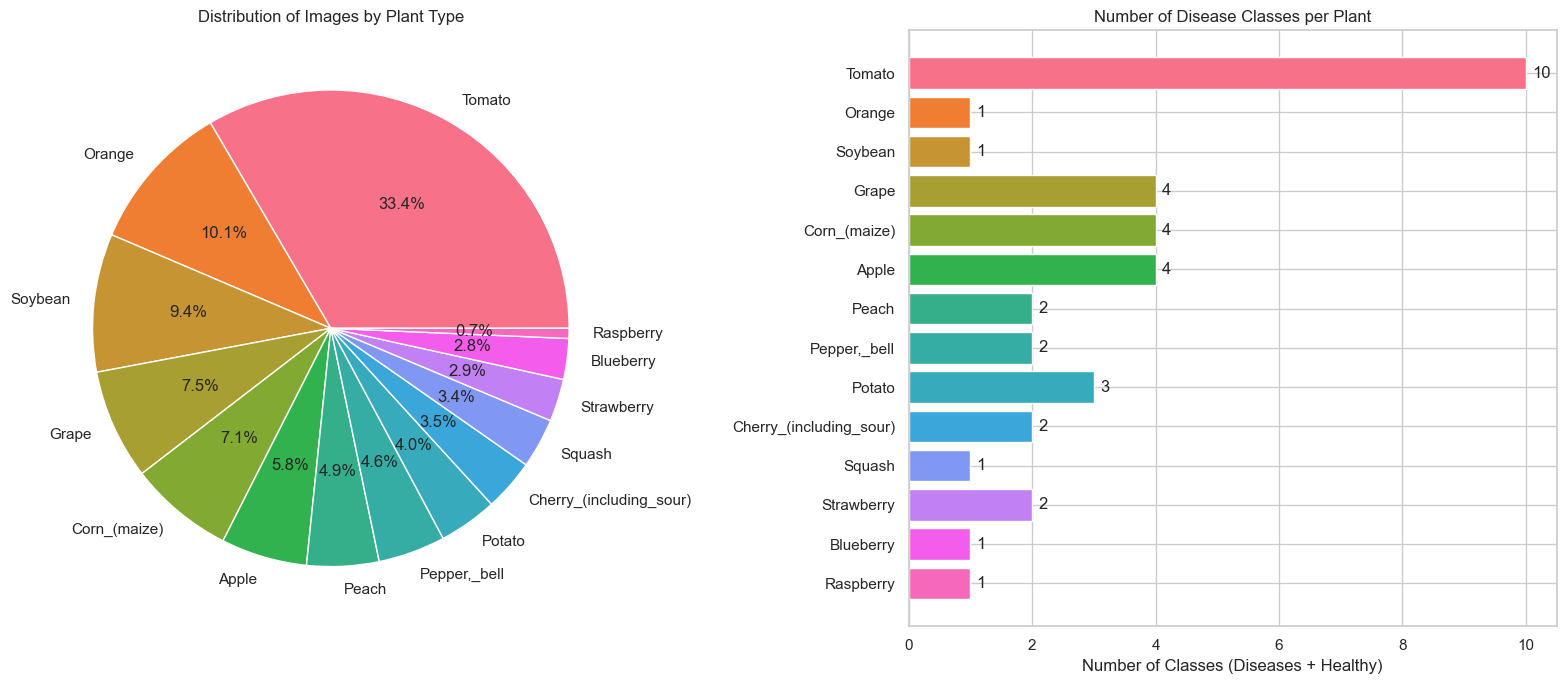

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\plant_distribution.png


In [7]:
# Pie chart of images by plant type
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Images per plant
ax1 = axes[0]
wedges, texts, autotexts = ax1.pie(
    df_plants["total_images"], 
    labels=df_plants.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("husl", len(df_plants))
)
ax1.set_title("Distribution of Images by Plant Type")

# Classes per plant
ax2 = axes[1]
ax2.barh(df_plants.index, df_plants["num_classes"], 
         color=sns.color_palette("husl", len(df_plants)))
ax2.set_xlabel("Number of Classes (Diseases + Healthy)")
ax2.set_title("Number of Disease Classes per Plant")
ax2.invert_yaxis()

for i, (idx, row) in enumerate(df_plants.iterrows()):
    ax2.text(row["num_classes"] + 0.1, i, str(row["num_classes"]), va="center")

plt.tight_layout()
plt.savefig(FIGURES_DIR / "plant_distribution.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'plant_distribution.png'}")

### 2.4 Healthy vs Diseased Analysis

Healthy samples:  15,084 (27.8%)
Diseased samples: 39,221 (72.2%)


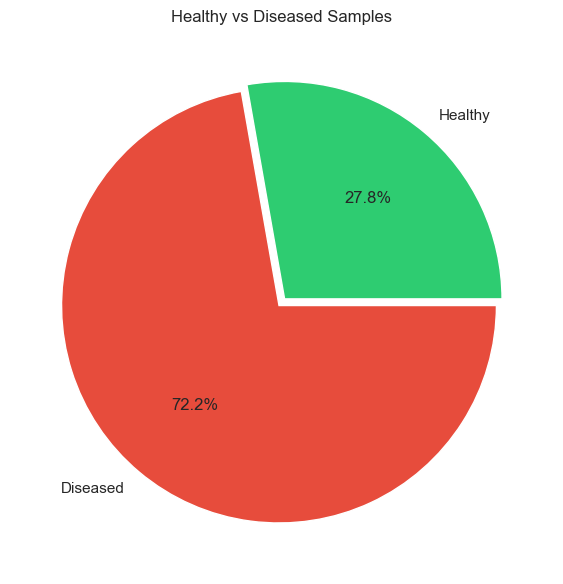

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\healthy_vs_diseased.png


In [8]:
# Classify as healthy or diseased
df_classes["is_healthy"] = df_classes["condition"].str.lower() == "healthy"

healthy_count = df_classes[df_classes["is_healthy"]]["count"].sum()
diseased_count = df_classes[~df_classes["is_healthy"]]["count"].sum()

print(f"Healthy samples:  {healthy_count:,} ({healthy_count/(healthy_count+diseased_count)*100:.1f}%)")
print(f"Diseased samples: {diseased_count:,} ({diseased_count/(healthy_count+diseased_count)*100:.1f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie([healthy_count, diseased_count], 
       labels=["Healthy", "Diseased"],
       autopct="%1.1f%%",
       colors=["#2ecc71", "#e74c3c"],
       explode=[0.02, 0.02])
ax.set_title("Healthy vs Diseased Samples")

plt.tight_layout()
plt.savefig(FIGURES_DIR / "healthy_vs_diseased.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'healthy_vs_diseased.png'}")

## 3. Image Properties Analysis

### 3.1 Sample Images for Analysis

In [9]:
# Sample images from each class for analysis
random.seed(42)
sample_size_per_class = 10  # Sample 10 images per class for property analysis

sampled_images = []
for class_dir in class_dirs:
    images = [f for f in class_dir.iterdir() 
              if f.is_file() and f.suffix.lower() in image_extensions]
    sampled = random.sample(images, min(sample_size_per_class, len(images)))
    sampled_images.extend(sampled)

print(f"Sampled {len(sampled_images)} images for property analysis")

Sampled 380 images for property analysis


In [10]:
# Analyze image properties
image_properties = []

for img_path in sampled_images:
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            mode = img.mode
            file_size = img_path.stat().st_size / 1024  # KB
            
            image_properties.append({
                "path": str(img_path),
                "class": img_path.parent.name,
                "width": width,
                "height": height,
                "aspect_ratio": width / height,
                "mode": mode,
                "file_size_kb": file_size
            })
    except Exception as e:
        print(f"Error reading {img_path}: {e}")

df_properties = pd.DataFrame(image_properties)
print(f"Analyzed {len(df_properties)} images")
df_properties.head()

Analyzed 380 images


path               class  \
0  D:\Repos\plant-disease-project\data\raw\plantv...  Apple___Apple_scab   
1  D:\Repos\plant-disease-project\data\raw\plantv...  Apple___Apple_scab   
2  D:\Repos\plant-disease-project\data\raw\plantv...  Apple___Apple_scab   
3  D:\Repos\plant-disease-project\data\raw\plantv...  Apple___Apple_scab   
4  D:\Repos\plant-disease-project\data\raw\plantv...  Apple___Apple_scab   

   width  height  aspect_ratio mode  file_size_kb  
0    256     256           1.0  RGB     16.741211  
1    256     256           1.0  RGB      8.810547  
2    256     256           1.0  RGB     15.402344  
3    256     256           1.0  RGB     12.354492  
4    256     256           1.0  RGB     17.654297

### 3.2 Image Dimensions

In [11]:
# Check unique dimensions
unique_dims = df_properties.groupby(["width", "height"]).size().reset_index(name="count")
print("Unique image dimensions:")
print(unique_dims)

print(f"\nDimension statistics:")
print(f"  Width  - Min: {df_properties['width'].min()}, Max: {df_properties['width'].max()}, Mean: {df_properties['width'].mean():.1f}")
print(f"  Height - Min: {df_properties['height'].min()}, Max: {df_properties['height'].max()}, Mean: {df_properties['height'].mean():.1f}")

Unique image dimensions:
   width  height  count
0    256     256    380

Dimension statistics:
  Width  - Min: 256, Max: 256, Mean: 256.0
  Height - Min: 256, Max: 256, Mean: 256.0


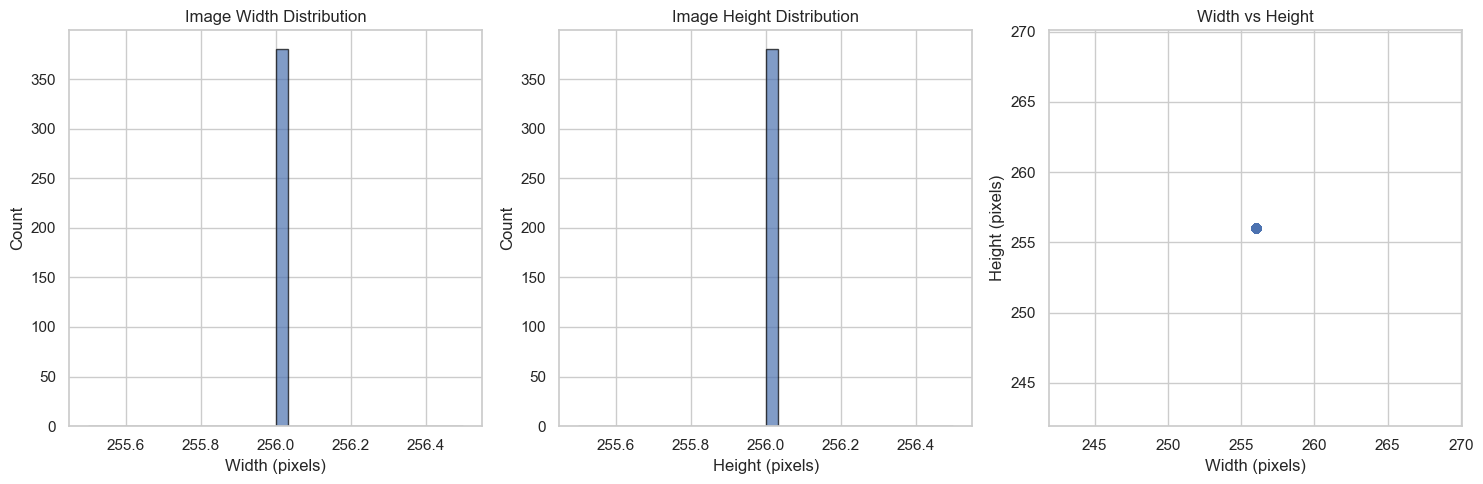

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\image_dimensions.png


In [12]:
# Visualize dimensions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Width distribution
axes[0].hist(df_properties["width"], bins=30, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Width (pixels)")
axes[0].set_ylabel("Count")
axes[0].set_title("Image Width Distribution")

# Height distribution
axes[1].hist(df_properties["height"], bins=30, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("Height (pixels)")
axes[1].set_ylabel("Count")
axes[1].set_title("Image Height Distribution")

# Width vs Height scatter
axes[2].scatter(df_properties["width"], df_properties["height"], alpha=0.5)
axes[2].set_xlabel("Width (pixels)")
axes[2].set_ylabel("Height (pixels)")
axes[2].set_title("Width vs Height")

plt.tight_layout()
plt.savefig(FIGURES_DIR / "image_dimensions.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'image_dimensions.png'}")

### 3.3 File Size Distribution

File size statistics (KB):
  Min:    6.2 KB
  Max:    25.5 KB
  Mean:   16.0 KB
  Median: 16.4 KB


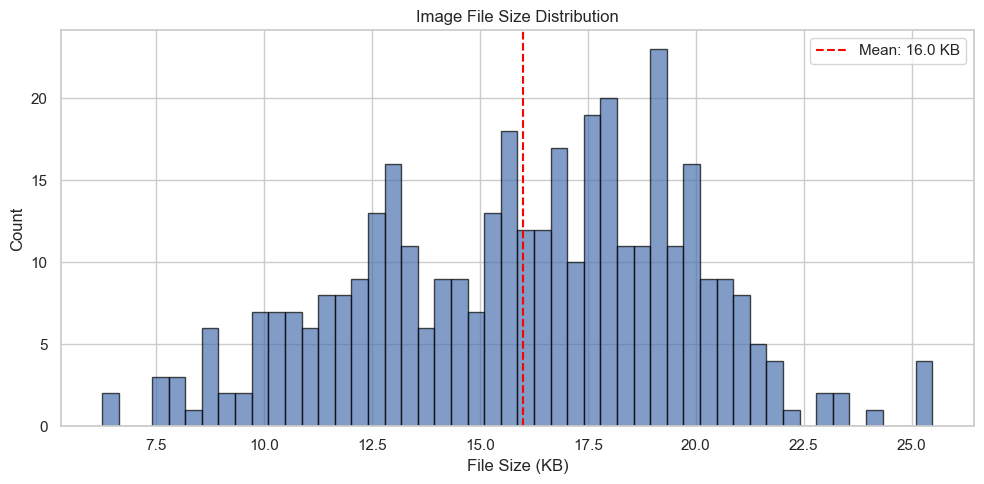

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\file_size_distribution.png


In [13]:
print("File size statistics (KB):")
print(f"  Min:    {df_properties['file_size_kb'].min():.1f} KB")
print(f"  Max:    {df_properties['file_size_kb'].max():.1f} KB")
print(f"  Mean:   {df_properties['file_size_kb'].mean():.1f} KB")
print(f"  Median: {df_properties['file_size_kb'].median():.1f} KB")

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_properties["file_size_kb"], bins=50, edgecolor="black", alpha=0.7)
ax.set_xlabel("File Size (KB)")
ax.set_ylabel("Count")
ax.set_title("Image File Size Distribution")
ax.axvline(df_properties["file_size_kb"].mean(), color="red", linestyle="--", label=f"Mean: {df_properties['file_size_kb'].mean():.1f} KB")
ax.legend()

plt.tight_layout()
plt.savefig(FIGURES_DIR / "file_size_distribution.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'file_size_distribution.png'}")

### 3.4 Image Color Modes

In [14]:
# Check color modes
mode_counts = df_properties["mode"].value_counts()
print("Image color modes:")
for mode, count in mode_counts.items():
    print(f"  {mode}: {count} ({count/len(df_properties)*100:.1f}%)")

Image color modes:
  RGB: 380 (100.0%)


## 4. Sample Image Visualization

### 4.1 Random Samples from Each Class

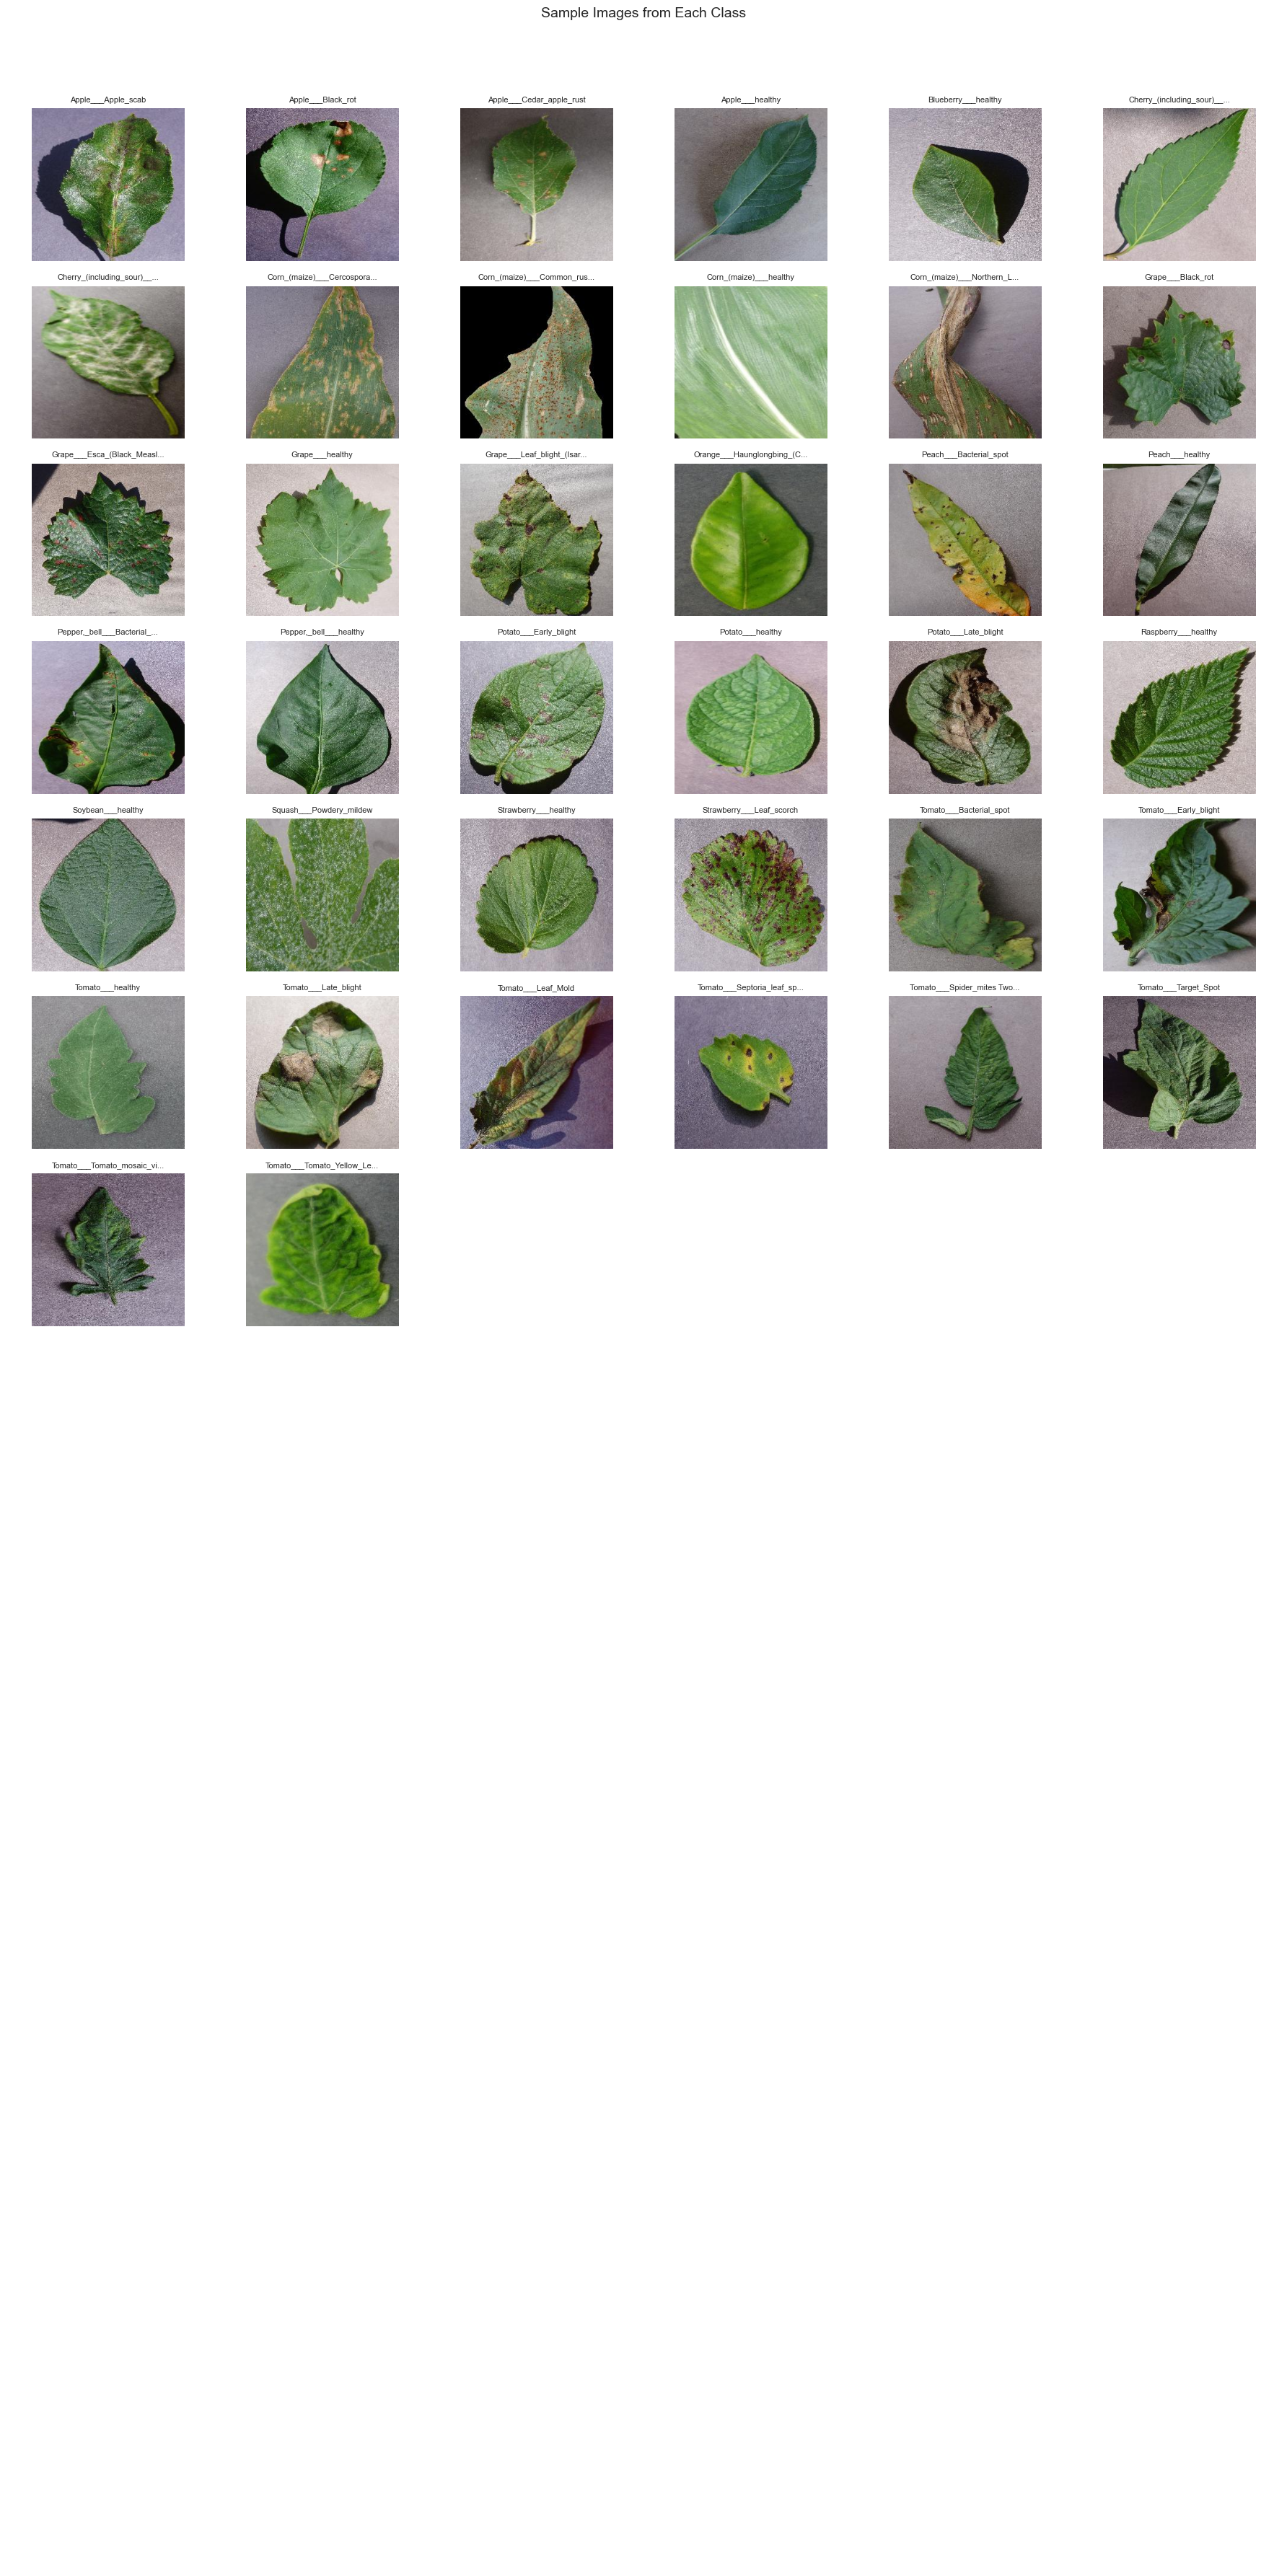

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\sample_images_all_classes.png


In [15]:
# Display sample images from each class (2 samples per class)
random.seed(42)
n_cols = 6
n_rows = (len(class_dirs) + n_cols - 1) // n_cols * 2  # 2 rows per set of classes

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 2.5))
axes = axes.flatten()

for i, class_dir in enumerate(class_dirs):
    images = [f for f in class_dir.iterdir() 
              if f.is_file() and f.suffix.lower() in image_extensions]
    if images:
        img_path = random.choice(images)
        img = Image.open(img_path)
        axes[i].imshow(img)
        # Truncate long class names
        title = class_dir.name[:25] + "..." if len(class_dir.name) > 25 else class_dir.name
        axes[i].set_title(title, fontsize=8)
    axes[i].axis("off")

# Hide unused axes
for j in range(len(class_dirs), len(axes)):
    axes[j].axis("off")

plt.suptitle("Sample Images from Each Class", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "sample_images_all_classes.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'sample_images_all_classes.png'}")

### 4.2 Healthy vs Diseased Comparison by Plant

In [16]:
# Find plants with both healthy and diseased samples
plants_with_both = df_classes.groupby("plant").apply(
    lambda x: x["is_healthy"].any() and (~x["is_healthy"]).any()
)
plants_with_both = plants_with_both[plants_with_both].index.tolist()
print(f"Plants with both healthy and diseased samples: {len(plants_with_both)}")
print(plants_with_both)

Plants with both healthy and diseased samples: 9
['Apple', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Peach', 'Pepper,_bell', 'Potato', 'Strawberry', 'Tomato']


C:\Users\jonah\AppData\Local\Temp\ipykernel_14144\4265849357.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plants_with_both = df_classes.groupby("plant").apply(


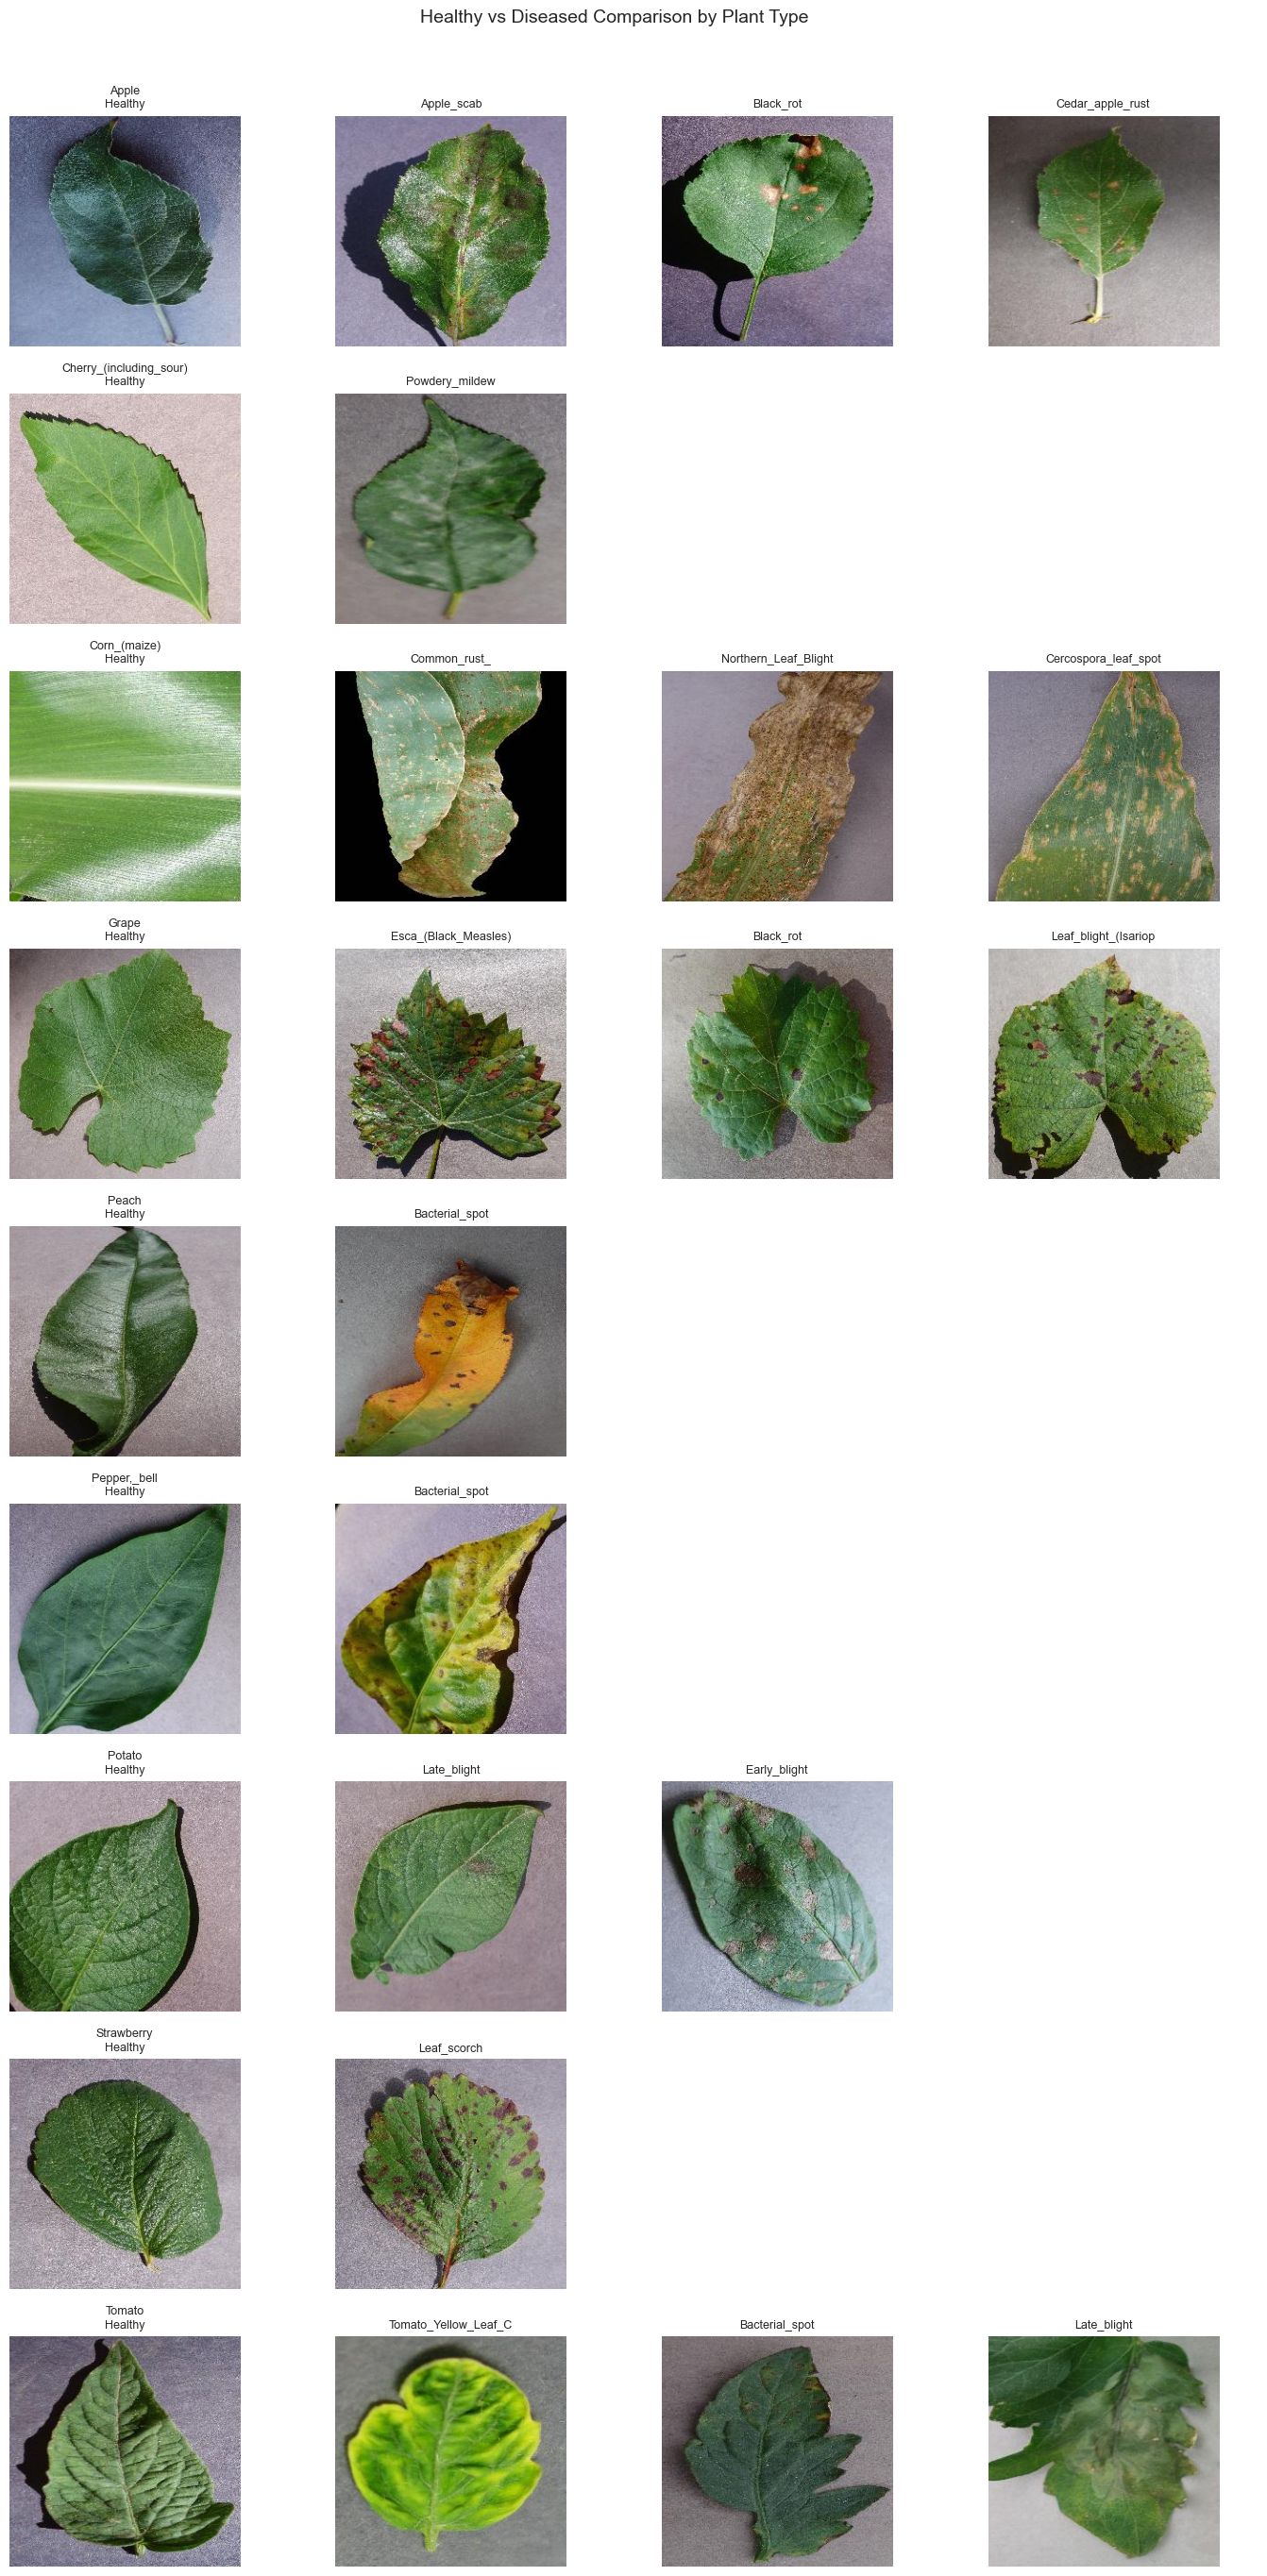

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\healthy_vs_diseased_comparison.png


In [17]:
# Create comparison grid
random.seed(42)
n_plants = len(plants_with_both)
fig, axes = plt.subplots(n_plants, 4, figsize=(14, n_plants * 3))

for i, plant in enumerate(sorted(plants_with_both)):
    plant_classes = df_classes[df_classes["plant"] == plant]
    healthy_class = plant_classes[plant_classes["is_healthy"]]["class_name"].values[0]
    diseased_classes = plant_classes[~plant_classes["is_healthy"]]["class_name"].values
    
    # Get healthy sample
    healthy_dir = DATA_DIR / healthy_class
    healthy_images = [f for f in healthy_dir.iterdir() 
                      if f.is_file() and f.suffix.lower() in image_extensions]
    healthy_img = Image.open(random.choice(healthy_images))
    
    # Show healthy
    axes[i, 0].imshow(healthy_img)
    axes[i, 0].set_title(f"{plant}\nHealthy", fontsize=9)
    axes[i, 0].axis("off")
    
    # Show up to 3 diseased samples
    for j, disease_class in enumerate(diseased_classes[:3]):
        disease_dir = DATA_DIR / disease_class
        disease_images = [f for f in disease_dir.iterdir() 
                          if f.is_file() and f.suffix.lower() in image_extensions]
        disease_img = Image.open(random.choice(disease_images))
        
        condition = disease_class.split("___")[1][:20]
        axes[i, j+1].imshow(disease_img)
        axes[i, j+1].set_title(f"{condition}", fontsize=9)
        axes[i, j+1].axis("off")
    
    # Hide unused axes
    for j in range(len(diseased_classes[:3]) + 1, 4):
        axes[i, j].axis("off")

plt.suptitle("Healthy vs Diseased Comparison by Plant Type", fontsize=14, y=1.01)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "healthy_vs_diseased_comparison.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'healthy_vs_diseased_comparison.png'}")

## 5. Color Distribution Analysis

### 5.1 RGB Channel Distributions

In [18]:
# Sample images for color analysis
random.seed(42)
color_sample_size = 5  # 5 images per class

color_samples = []
for class_dir in class_dirs:
    images = [f for f in class_dir.iterdir() 
              if f.is_file() and f.suffix.lower() in image_extensions]
    sampled = random.sample(images, min(color_sample_size, len(images)))
    color_samples.extend([(f, class_dir.name) for f in sampled])

print(f"Sampled {len(color_samples)} images for color analysis")

Sampled 190 images for color analysis


In [19]:
# Calculate mean RGB values per image
rgb_data = []

for img_path, class_name in color_samples:
    try:
        with Image.open(img_path) as img:
            if img.mode != "RGB":
                img = img.convert("RGB")
            img_array = np.array(img)
            
            rgb_data.append({
                "class": class_name,
                "plant": class_name.split("___")[0],
                "is_healthy": "healthy" in class_name.lower(),
                "mean_r": img_array[:,:,0].mean(),
                "mean_g": img_array[:,:,1].mean(),
                "mean_b": img_array[:,:,2].mean(),
                "std_r": img_array[:,:,0].std(),
                "std_g": img_array[:,:,1].std(),
                "std_b": img_array[:,:,2].std(),
            })
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

df_rgb = pd.DataFrame(rgb_data)
print(f"Processed {len(df_rgb)} images for RGB analysis")
df_rgb.head()

Processed 190 images for RGB analysis


class  plant  is_healthy      mean_r      mean_g      mean_b  \
0  Apple___Apple_scab  Apple       False  112.061081  120.098358  109.649719   
1  Apple___Apple_scab  Apple       False  116.053284  132.605301   90.650543   
2  Apple___Apple_scab  Apple       False   86.714188  109.878799   96.051422   
3  Apple___Apple_scab  Apple       False   78.094696   95.941757  102.462357   
4  Apple___Apple_scab  Apple       False   87.305649  100.201935   88.465958   

       std_r      std_g      std_b  
0  48.936432  42.989400  60.802463  
1  30.455200  19.262759  42.662767  
2  27.710942  19.670956  37.433236  
3  37.126251  27.258435  48.238222  
4  38.583309  31.200806  50.328322

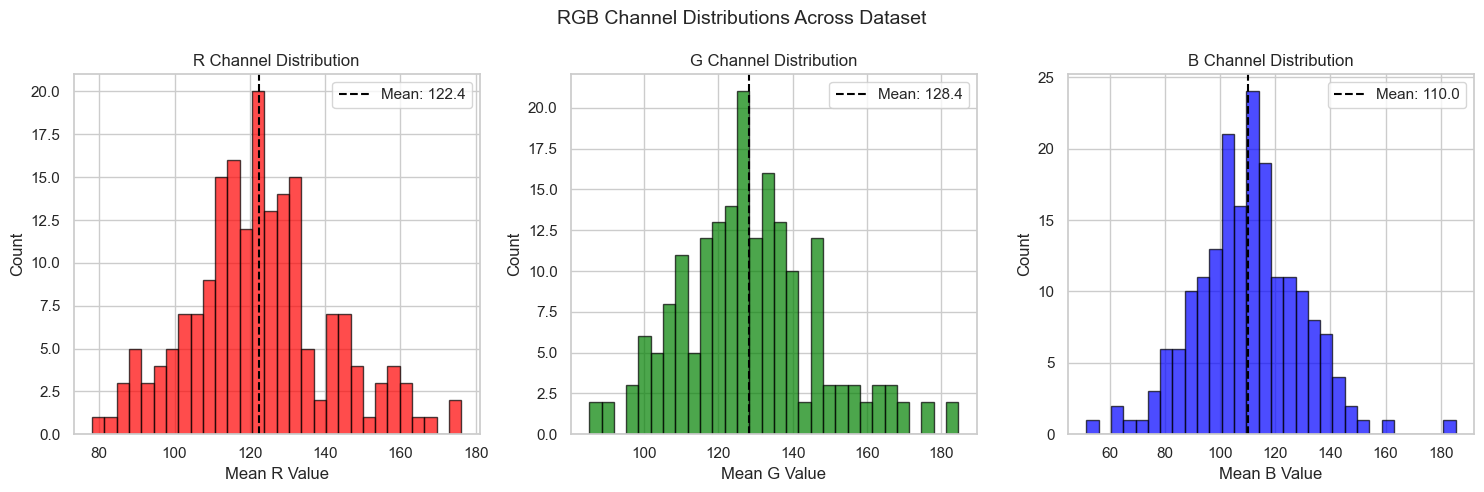

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\rgb_distribution.png


In [20]:
# Overall RGB distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (channel, color) in enumerate([("mean_r", "red"), ("mean_g", "green"), ("mean_b", "blue")]):
    axes[idx].hist(df_rgb[channel], bins=30, color=color, alpha=0.7, edgecolor="black")
    axes[idx].set_xlabel(f"Mean {channel[-1].upper()} Value")
    axes[idx].set_ylabel("Count")
    axes[idx].set_title(f"{channel[-1].upper()} Channel Distribution")
    axes[idx].axvline(df_rgb[channel].mean(), color="black", linestyle="--", 
                      label=f"Mean: {df_rgb[channel].mean():.1f}")
    axes[idx].legend()

plt.suptitle("RGB Channel Distributions Across Dataset", fontsize=14)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "rgb_distribution.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'rgb_distribution.png'}")

### 5.2 Mean Color by Class

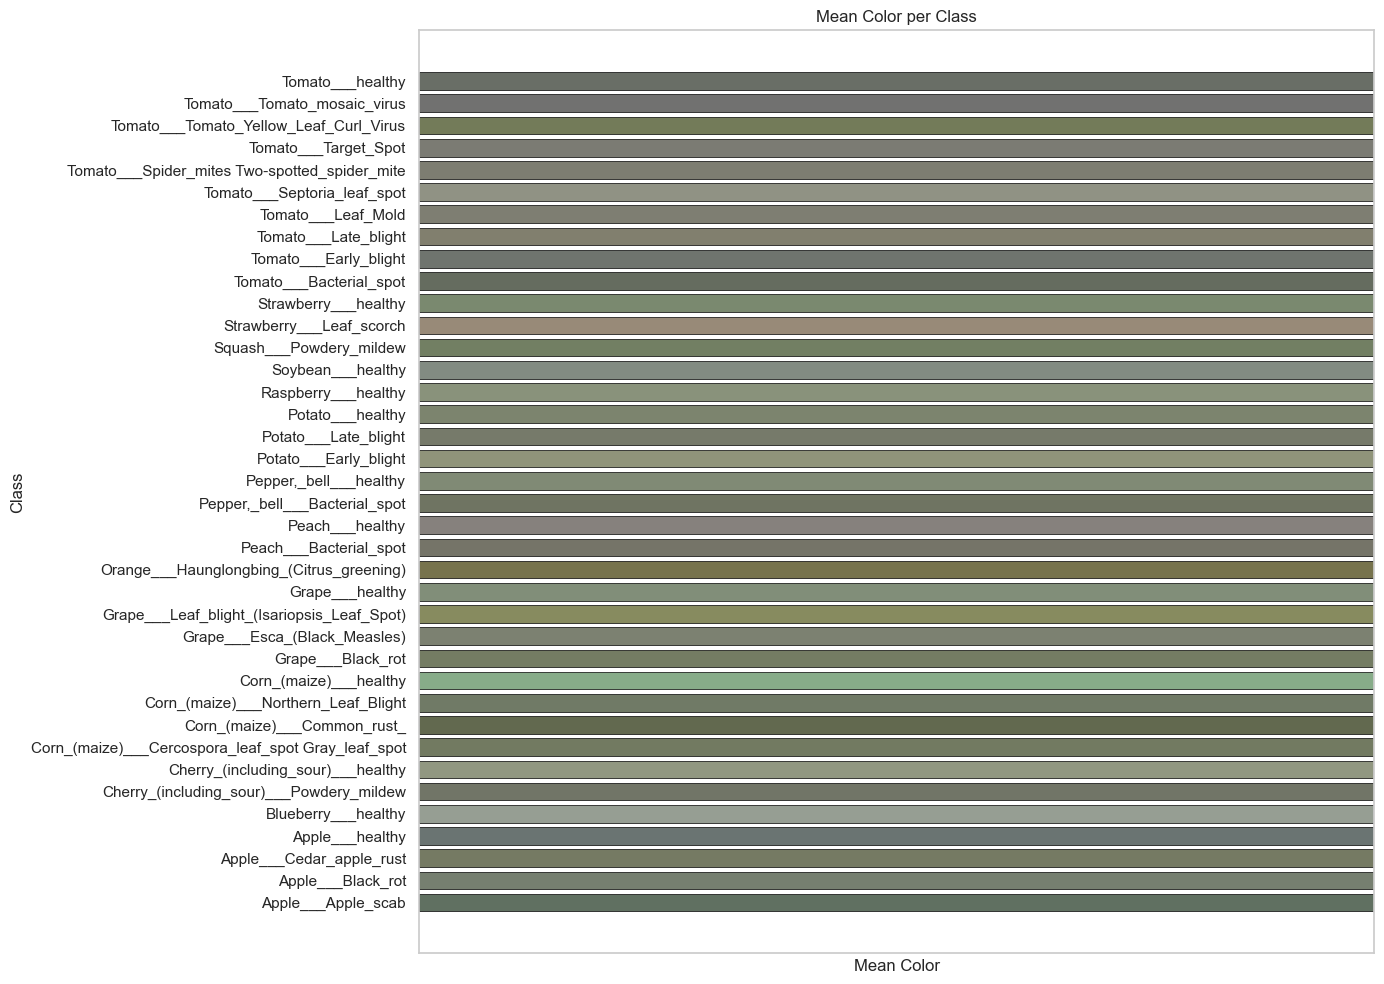

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\mean_color_per_class.png


In [21]:
# Calculate mean RGB per class
df_class_rgb = df_rgb.groupby("class").agg({
    "mean_r": "mean",
    "mean_g": "mean", 
    "mean_b": "mean"
}).reset_index()

# Create color swatches
fig, ax = plt.subplots(figsize=(14, 10))

for i, row in df_class_rgb.iterrows():
    color = (row["mean_r"]/255, row["mean_g"]/255, row["mean_b"]/255)
    ax.barh(row["class"], 1, color=color, edgecolor="black", linewidth=0.5)

ax.set_xlabel("Mean Color")
ax.set_ylabel("Class")
ax.set_title("Mean Color per Class")
ax.set_xlim(0, 1)
ax.set_xticks([])

plt.tight_layout()
plt.savefig(FIGURES_DIR / "mean_color_per_class.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'mean_color_per_class.png'}")

### 5.3 Healthy vs Diseased Color Comparison

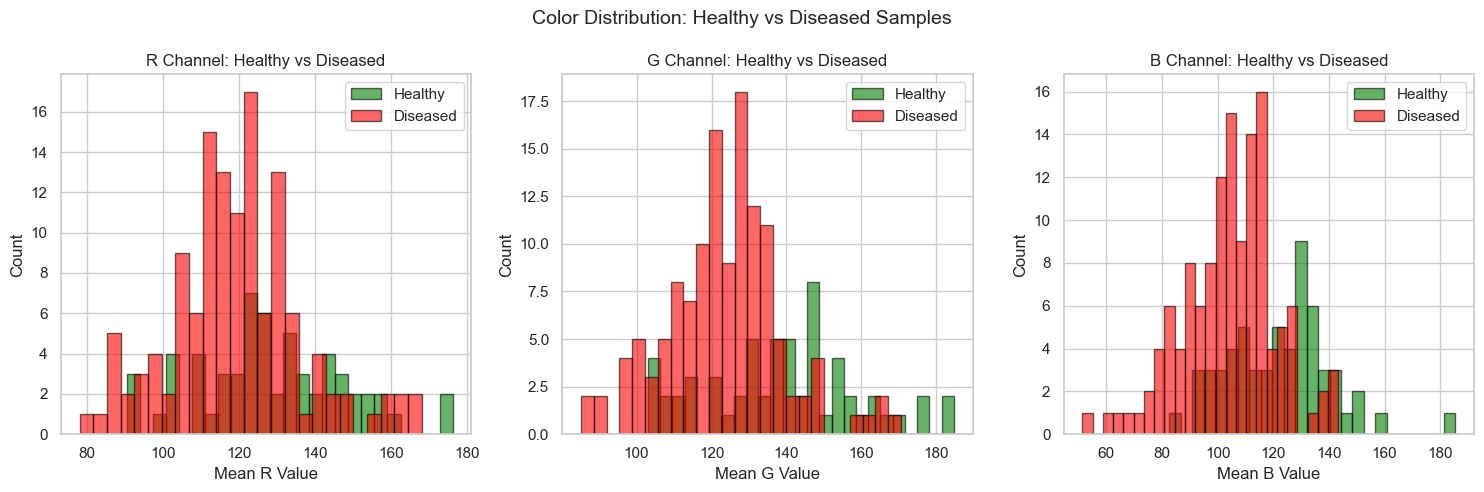

Saved: D:\Repos\plant-disease-project\ml\outputs\figures\rgb_healthy_vs_diseased.png


In [22]:
# Compare RGB distributions: healthy vs diseased
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, channel in enumerate(["mean_r", "mean_g", "mean_b"]):
    healthy_data = df_rgb[df_rgb["is_healthy"]][channel]
    diseased_data = df_rgb[~df_rgb["is_healthy"]][channel]
    
    axes[idx].hist(healthy_data, bins=25, alpha=0.6, label="Healthy", color="green", edgecolor="black")
    axes[idx].hist(diseased_data, bins=25, alpha=0.6, label="Diseased", color="red", edgecolor="black")
    axes[idx].set_xlabel(f"Mean {channel[-1].upper()} Value")
    axes[idx].set_ylabel("Count")
    axes[idx].set_title(f"{channel[-1].upper()} Channel: Healthy vs Diseased")
    axes[idx].legend()

plt.suptitle("Color Distribution: Healthy vs Diseased Samples", fontsize=14)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "rgb_healthy_vs_diseased.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Saved: {FIGURES_DIR / 'rgb_healthy_vs_diseased.png'}")

## 6. Key Findings & Recommendations

In [23]:
# Summary statistics
print("=" * 60)
print("KEY FINDINGS SUMMARY")
print("=" * 60)

print(f"\n DATASET OVERVIEW:")
print(f"   • Total images: {df_classes['count'].sum():,}")
print(f"   • Number of classes: {len(df_classes)}")
print(f"   • Number of plant types: {df_classes['plant'].nunique()}")

print(f"\n CLASS IMBALANCE:")
print(f"   • Min class size: {df_classes['count'].min():,} ({df_classes.iloc[-1]['class_name']})")
print(f"   • Max class size: {df_classes['count'].max():,} ({df_classes.iloc[0]['class_name']})")
print(f"   • Imbalance ratio: {df_classes['count'].max() / df_classes['count'].min():.2f}x")

print(f"\n IMAGE PROPERTIES:")
print(f"   • Dimensions: {df_properties['width'].mode().values[0]}x{df_properties['height'].mode().values[0]} (most common)")
print(f"   • File size: {df_properties['file_size_kb'].mean():.1f} KB (mean)")
print(f"   • Color mode: {df_properties['mode'].mode().values[0]} (most common)")

print(f"\n HEALTHY VS DISEASED:")
print(f"   • Healthy samples: {healthy_count:,} ({healthy_count/(healthy_count+diseased_count)*100:.1f}%)")
print(f"   • Diseased samples: {diseased_count:,} ({diseased_count/(healthy_count+diseased_count)*100:.1f}%)")

KEY FINDINGS SUMMARY

 DATASET OVERVIEW:
   • Total images: 54,305
   • Number of classes: 38
   • Number of plant types: 14

 CLASS IMBALANCE:
   • Min class size: 152 (Potato___healthy)
   • Max class size: 5,507 (Orange___Haunglongbing_(Citrus_greening))
   • Imbalance ratio: 36.23x

 IMAGE PROPERTIES:
   • Dimensions: 256x256 (most common)
   • File size: 16.0 KB (mean)
   • Color mode: RGB (most common)

 HEALTHY VS DISEASED:
   • Healthy samples: 15,084 (27.8%)
   • Diseased samples: 39,221 (72.2%)


In [24]:
# Save class counts to CSV for reference
df_classes.to_csv(FIGURES_DIR.parent / "class_counts.csv", index=False)
print(f"Saved class counts to: {FIGURES_DIR.parent / 'class_counts.csv'}")

print("\n" + "=" * 60)
print("EDA COMPLETE")
print("=" * 60)
print(f"\nFigures saved to: {FIGURES_DIR}")
print("Files generated:")
for f in sorted(FIGURES_DIR.glob("*.png")):
    print(f"  • {f.name}")

Saved class counts to: D:\Repos\plant-disease-project\ml\outputs\class_counts.csv

EDA COMPLETE

Figures saved to: D:\Repos\plant-disease-project\ml\outputs\figures
Files generated:
  • class_distribution.png
  • file_size_distribution.png
  • healthy_vs_diseased.png
  • healthy_vs_diseased_comparison.png
  • image_dimensions.png
  • mean_color_per_class.png
  • plant_distribution.png
  • rgb_distribution.png
  • rgb_healthy_vs_diseased.png
  • sample_images_all_classes.png
